In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [64]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [65]:
df = pd.read_csv("data/include_total_rank.csv")
df.head()

,Unnamed: 0,비상소화장치 설치개수,서울시 주거 시설 중 주택 비율,인구밀도(명/km^2),재산피해,노후 주택 수,소방관 1명당 담당인구,화재발생건수,안전센터 1개소당 담당인구,출동소요시간,비상소화장치 설치개수 점수,서울시 주거 시설 중 주택 비율 점수,인구밀도(명/km^2) 점수,재산피해 점수,노후 주택 수 점수,소방관 1명당 담당인구 점수,화재발생건수 점수,안전센터 1개소당 담당인구 점수,출동소요시간 점수,전체 점수
0,송파구,34,36.886429,19483,673.064286,32395,2040,92,109800,357.089372,24,8,19,17,20,25,24,21,12,170
1,관악구,169,55.976360,16838,434.812721,43306,1776,119,121688,387.541593,5,21,13,5,24,21,25,25,20,159
2,강서구,52,57.850339,13723,623.286396,40600,1795,50,94861,394.221687,21,22,6,16,23,22,9,16,22,157
3,은평구,83,29.408930,15849,1055.533170,48925,1823,79,116687,348.853960,14,4,11,23,25,24,21,24,10,156
4,금천구,29,48.382956,18517,805.242754,17727,1228,82,114821,384.069343,25,18,17,19,4,6,23,23,19,154


In [66]:
# 'Unnamed: 0' 열의 이름을 '구이름'으로 변경
df.rename(columns={'Unnamed: 0': '구이름', '노후 주택 수  점수':'노후 주택 수 점수'}, inplace=True)

In [67]:
df.columns

Index(['구이름', '비상소화장치 설치개수', '서울시 주거 시설 중 주택 비율', '인구밀도(명/km^2)', '재산피해',
       '노후 주택 수 ', '소방관 1명당 담당인구', '화재발생건수', '안전센터 1개소당 담당인구', '출동소요시간',
       '비상소화장치 설치개수 점수', '서울시 주거 시설 중 주택 비율 점수', '인구밀도(명/km^2) 점수', '재산피해 점수',
       '노후 주택 수 점수', '소방관 1명당 담당인구 점수', '화재발생건수 점수', '안전센터 1개소당 담당인구 점수',
       '출동소요시간 점수', '전체 점수'],
      dtype='object')

In [68]:
df = df.drop(columns={'재산피해', '재산피해 점수'})
df.head()

,구이름,비상소화장치 설치개수,서울시 주거 시설 중 주택 비율,인구밀도(명/km^2),노후 주택 수,소방관 1명당 담당인구,화재발생건수,안전센터 1개소당 담당인구,출동소요시간,비상소화장치 설치개수 점수,서울시 주거 시설 중 주택 비율 점수,인구밀도(명/km^2) 점수,노후 주택 수 점수,소방관 1명당 담당인구 점수,화재발생건수 점수,안전센터 1개소당 담당인구 점수,출동소요시간 점수,전체 점수
0,송파구,34,36.886429,19483,32395,2040,92,109800,357.089372,24,8,19,20,25,24,21,12,170
1,관악구,169,55.976360,16838,43306,1776,119,121688,387.541593,5,21,13,24,21,25,25,20,159
2,강서구,52,57.850339,13723,40600,1795,50,94861,394.221687,21,22,6,23,22,9,16,22,157
3,은평구,83,29.408930,15849,48925,1823,79,116687,348.853960,14,4,11,25,24,21,24,10,156
4,금천구,29,48.382956,18517,17727,1228,82,114821,384.069343,25,18,17,4,6,23,23,19,154


In [69]:
# '비상소화장치 설치개수 점수'부터 '출동소요시간 점수'까지 합산하여 '전체 점수' 업데이트
점수_열 = ['비상소화장치 설치개수 점수', '서울시 주거 시설 중 주택 비율 점수', '인구밀도(명/km^2) 점수', '노후 주택 수 점수', '소방관 1명당 담당인구 점수', '화재발생건수 점수', '안전센터 1개소당 담당인구 점수', '출동소요시간 점수']
df['전체 점수'] = df[점수_열].sum(axis=1)

In [71]:
def create_and_save_plot(df, y_column, title, xaxis_title, yaxis_title, file_name):
    # 데이터 정렬
    df_sorted = df.sort_values(y_column, ascending=False)
    
    # color_map 설정
    color_map = {구이름: 'gray' for 구이름 in df_sorted['구이름'].unique()}
    color_map['송파구'] = 'red'  # 송파구만 'red'로 설정
    
    # 시각화
    fig = px.bar(df_sorted, x='구이름', y=y_column, title=title,
                 color='구이름', color_discrete_map=color_map, text=y_column)
    fig.update_layout(xaxis_title=xaxis_title, yaxis_title=yaxis_title, showlegend=False)
    fig.show()
    
    # 파일로 저장
    fig.write_image(file_name)

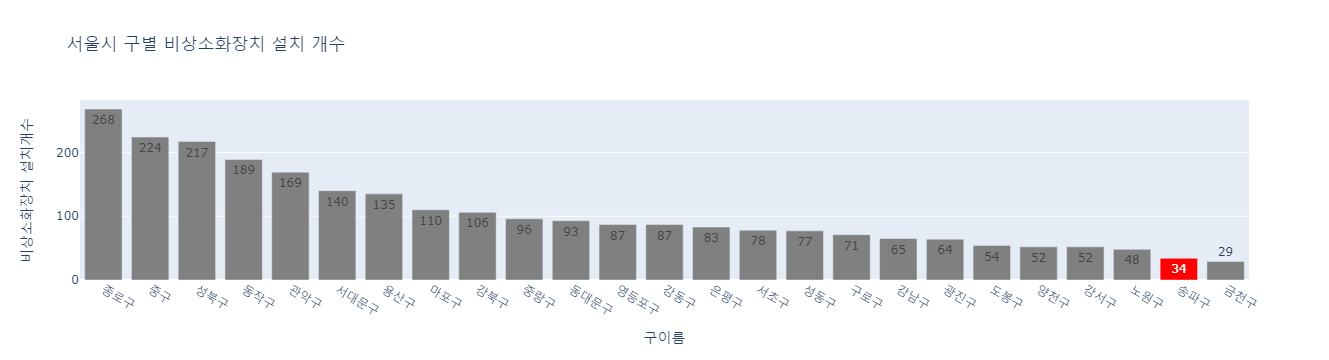

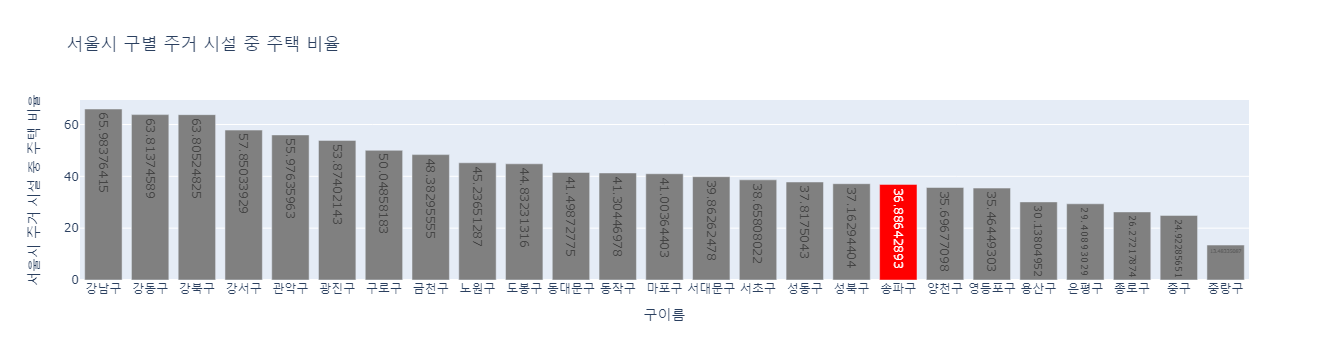

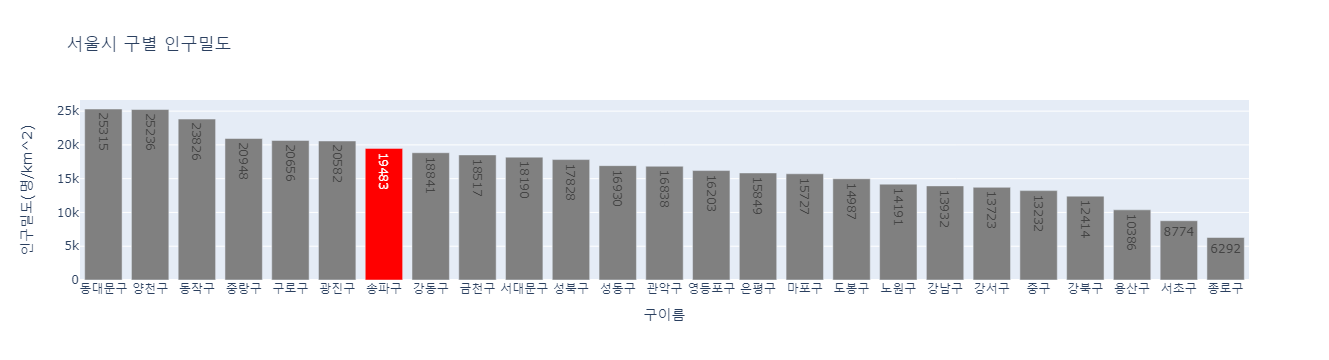

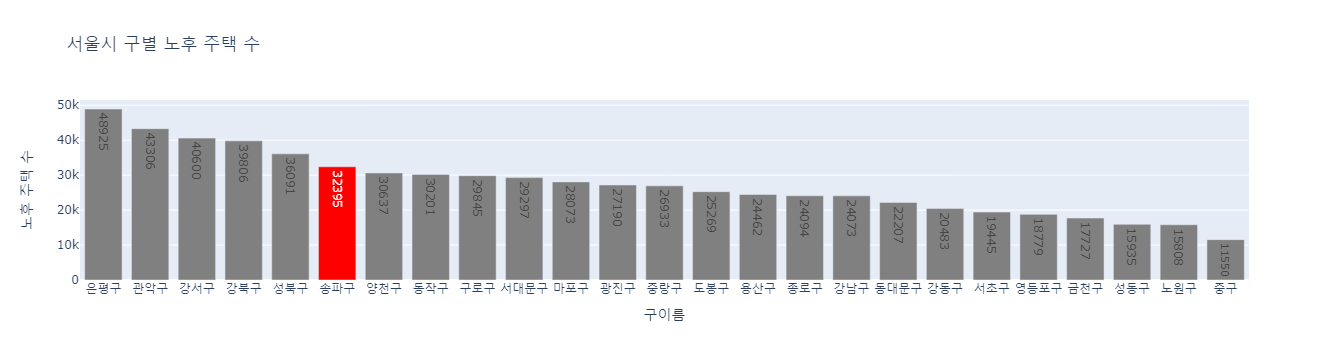

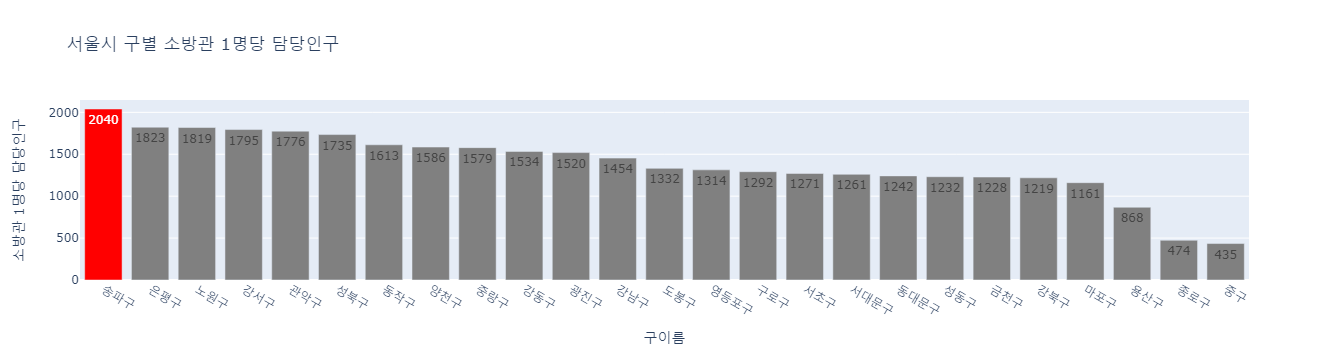

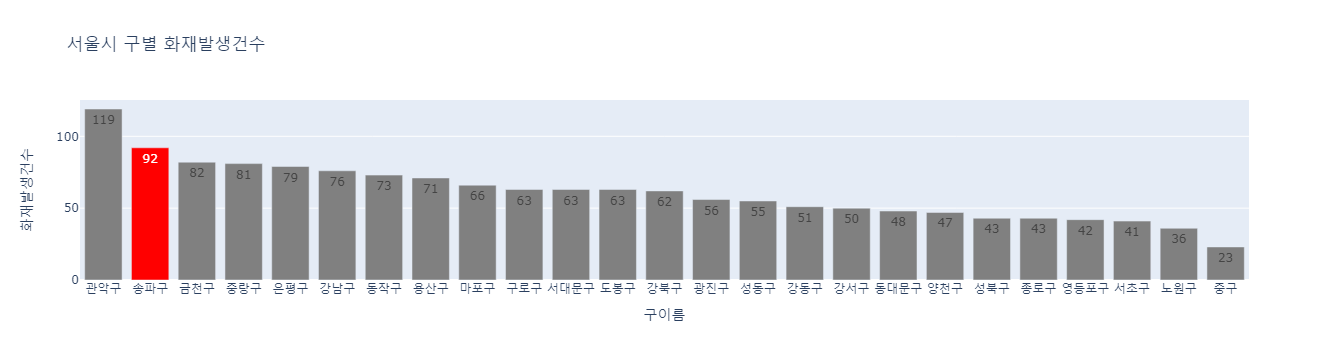

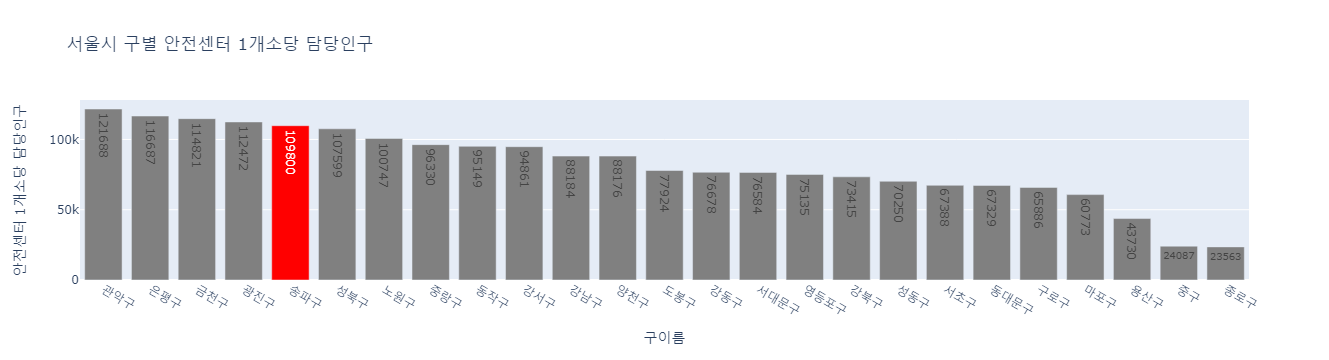

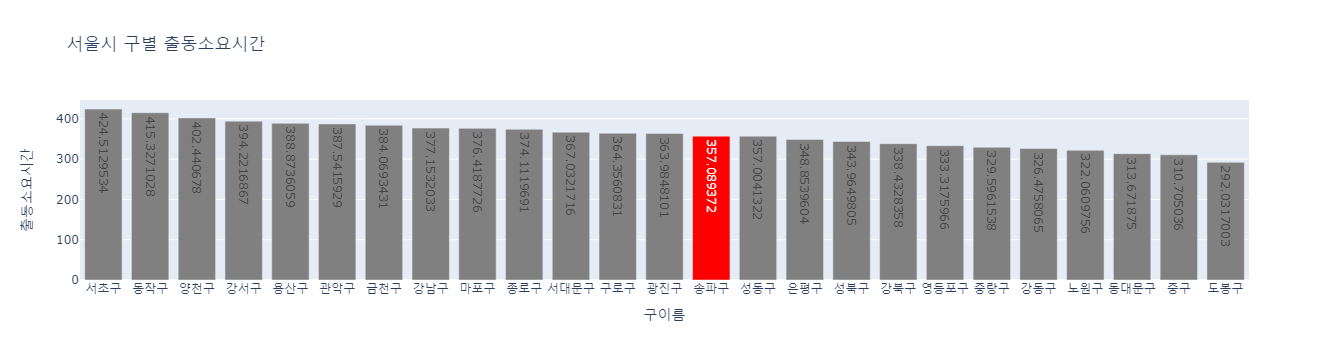

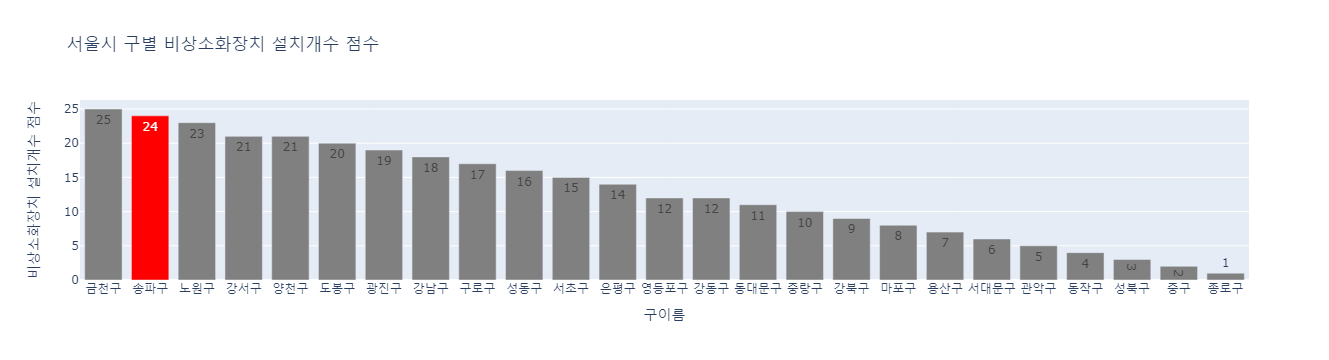

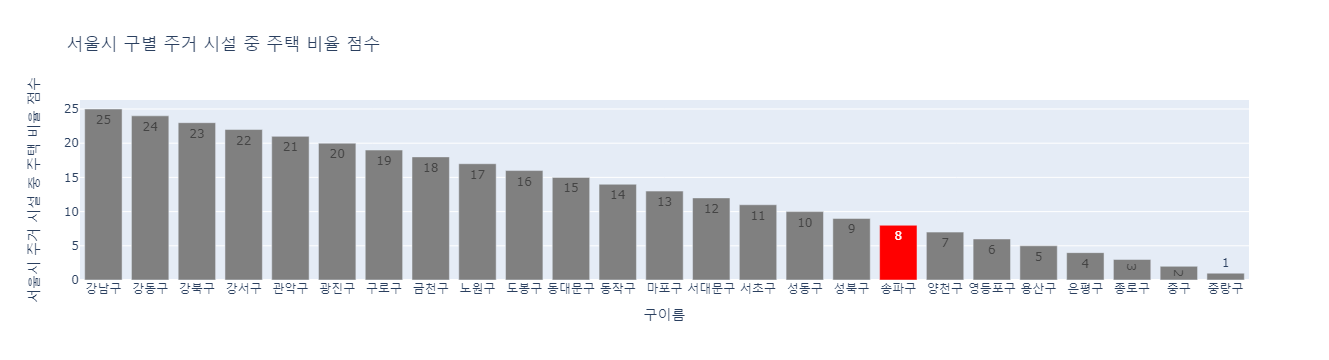

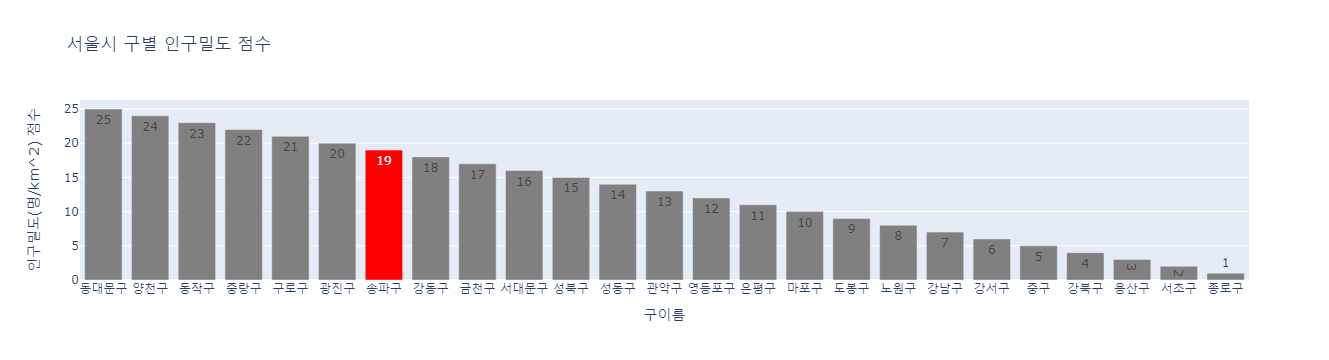

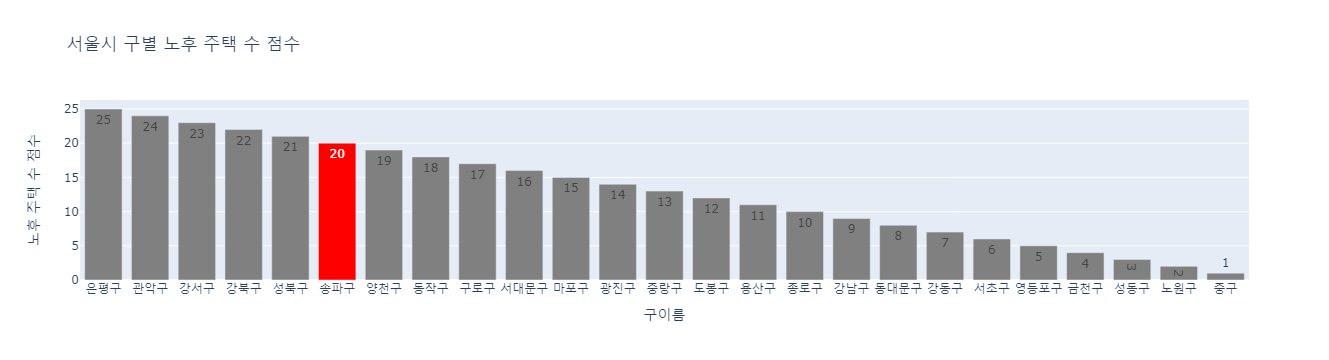

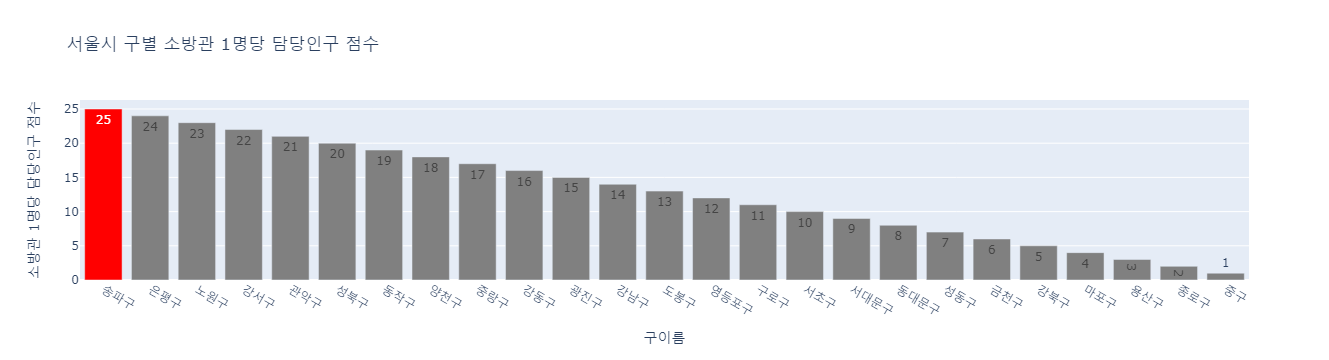

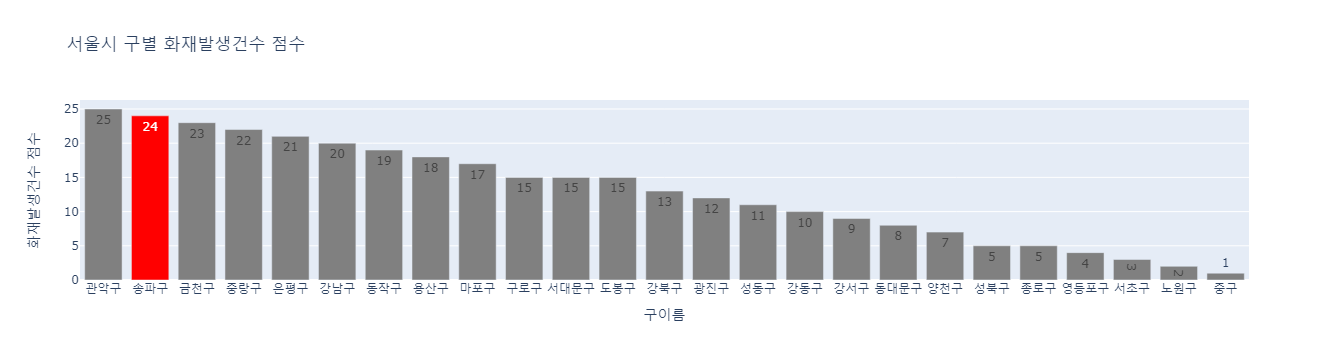

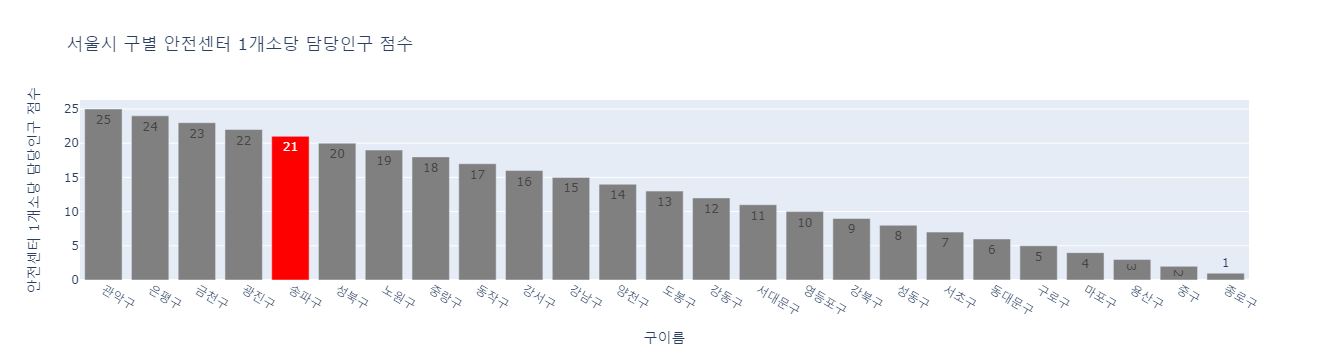

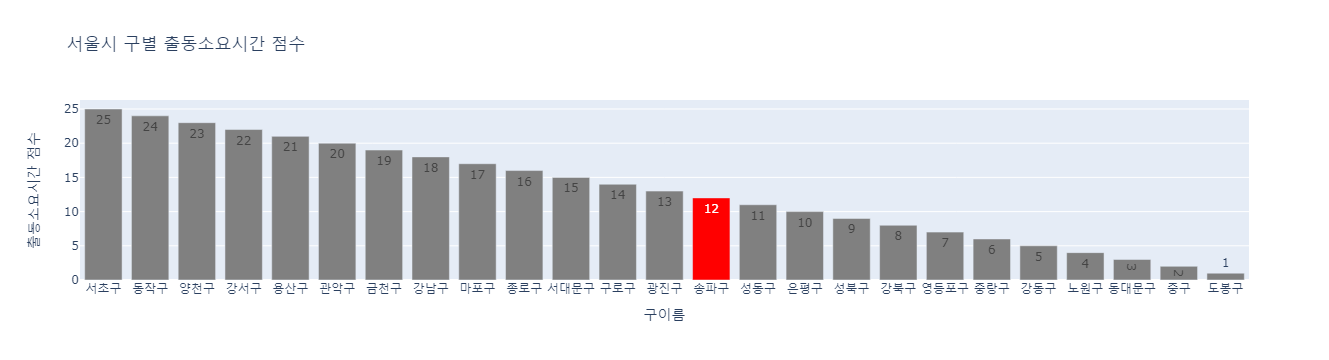

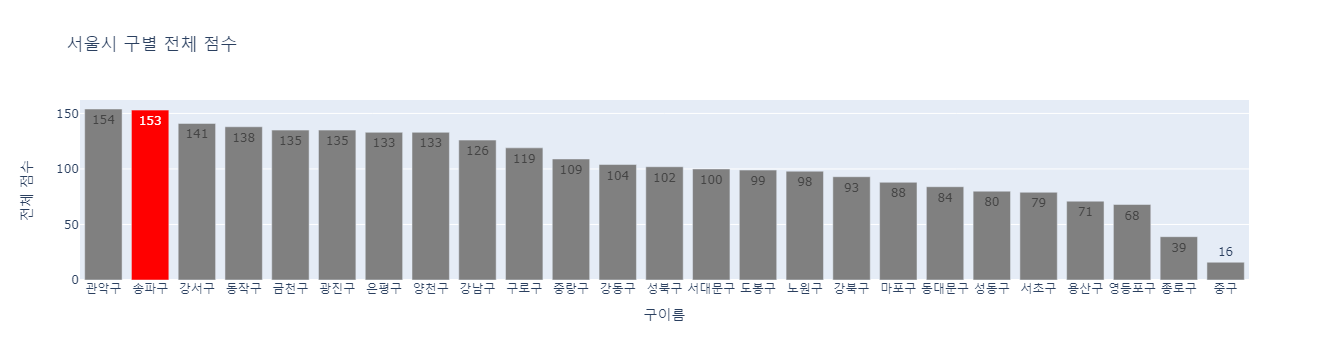

In [73]:
create_and_save_plot(df, '비상소화장치 설치개수', '서울시 구별 비상소화장치 설치 개수', '구이름', '비상소화장치 설치개수', "result/서울시_구별_비상소화장치_설치_개수.png")

create_and_save_plot(df, '서울시 주거 시설 중 주택 비율', '서울시 구별 주거 시설 중 주택 비율', '구이름', '서울시 주거 시설 중 주택 비율', "result/서울시_구별_주거_시설_중_주택_비율.png")

create_and_save_plot(df, '인구밀도(명/km^2)', '서울시 구별 인구밀도', '구이름', '인구밀도(명/km^2)', "result/서울시_구별_인구밀도.png")

create_and_save_plot(df, '노후 주택 수 ', '서울시 구별 노후 주택 수', '구이름', '노후 주택 수 ', "result/서울시_구별_노후_주택_수.png")

create_and_save_plot(df, '소방관 1명당 담당인구', '서울시 구별 소방관 1명당 담당인구', '구이름', '소방관 1명당 담당인구', "result/서울시_구별_소방관_1명당_담당인구.png")

create_and_save_plot(df, '화재발생건수', '서울시 구별 화재발생건수', '구이름', '화재발생건수', "result/서울시_구별_화재발생건수.png")

create_and_save_plot(df, '안전센터 1개소당 담당인구', '서울시 구별 안전센터 1개소당 담당인구', '구이름', '안전센터 1개소당 담당인구', "result/서울시_구별_안전센터_1개소당_담당인구.png")

create_and_save_plot(df, '출동소요시간', '서울시 구별 출동소요시간', '구이름', '출동소요시간', "result/서울시_구별_출동소요시간.png")

create_and_save_plot(df, '비상소화장치 설치개수 점수', '서울시 구별 비상소화장치 설치개수 점수', '구이름', '비상소화장치 설치개수 점수', "result/서울시_구별_비상소화장치_설치개수_점수.png")

create_and_save_plot(df, '서울시 주거 시설 중 주택 비율 점수', '서울시 구별 주거 시설 중 주택 비율 점수', '구이름', '서울시 주거 시설 중 주택 비율 점수', "result/서울시_구별_주거_시설_중_주택_비율_점수.png")

create_and_save_plot(df, '인구밀도(명/km^2) 점수', '서울시 구별 인구밀도 점수', '구이름', '인구밀도(명/km^2) 점수', "result/서울시_구별_인구밀도_점수.png")

create_and_save_plot(df, '노후 주택 수 점수', '서울시 구별 노후 주택 수 점수', '구이름', '노후 주택 수 점수', "result/서울시_구별_노후_주택_수_점수.png")

create_and_save_plot(df, '소방관 1명당 담당인구 점수', '서울시 구별 소방관 1명당 담당인구 점수', '구이름', '소방관 1명당 담당인구 점수', "result/서울시_구별_소방관_1명당_담당인구_점수.png")

create_and_save_plot(df, '화재발생건수 점수', '서울시 구별 화재발생건수 점수', '구이름', '화재발생건수 점수', "result/서울시_구별_화재발생건수_점수.png")

create_and_save_plot(df, '안전센터 1개소당 담당인구 점수', '서울시 구별 안전센터 1개소당 담당인구 점수', '구이름', '안전센터 1개소당 담당인구 점수', "result/서울시_구별_안전센터_1개소당_담당인구_점수.png")

create_and_save_plot(df, '출동소요시간 점수', '서울시 구별 출동소요시간 점수', '구이름', '출동소요시간 점수', "result/서울시_구별_출동소요시간_점수.png")

create_and_save_plot(df, '전체 점수', '서울시 구별 전체 점수', '구이름', '전체 점수', "result/서울시_구별_전체_점수.png")


## 각 열의 평균값

In [74]:
df.mean(numeric_only=True)

비상소화장치 설치개수               105.120000
서울시 주거 시설 중 주택 비율          42.375396
인구밀도(명/km^2)            16756.000000
노후 주택 수                 27325.240000
소방관 1명당 담당인구             1384.120000
화재발생건수                     61.000000
안전센터 1개소당 담당인구          81970.240000
출동소요시간                    359.729936
비상소화장치 설치개수 점수             12.920000
서울시 주거 시설 중 주택 비율 점수       13.000000
인구밀도(명/km^2) 점수            13.000000
노후 주택 수 점수                 13.000000
소방관 1명당 담당인구 점수            13.000000
화재발생건수 점수                  12.960000
안전센터 1개소당 담당인구 점수          13.000000
출동소요시간 점수                  13.000000
전체 점수                     103.880000
dtype: float64

## 변수들 상관관계 분석

In [75]:
columns_to_exclude = [col for col in df.columns if '점수' in col]
df_filtered = df.drop(columns=columns_to_exclude)

In [76]:
# 구이름빼기
correlation_matrix = df_filtered.drop('구이름', axis=1).corr()

In [77]:
correlation_matrix

,비상소화장치 설치개수,서울시 주거 시설 중 주택 비율,인구밀도(명/km^2),노후 주택 수,소방관 1명당 담당인구,화재발생건수,안전센터 1개소당 담당인구,출동소요시간
비상소화장치 설치개수,1.000000,-0.350576,-0.285822,0.038752,-0.503682,-0.165322,-0.456989,0.032454
서울시 주거 시설 중 주택 비율,-0.350576,1.000000,0.033159,0.182121,0.293775,0.164477,0.299764,0.103750
인구밀도(명/km^2),-0.285822,0.033159,1.000000,0.104857,0.461481,0.201919,0.461515,-0.074976
노후 주택 수,0.038752,0.182121,0.104857,1.000000,0.522643,0.520634,0.492042,0.232492
소방관 1명당 담당인구,-0.503682,0.293775,0.461481,0.522643,1.000000,0.420564,0.888103,0.085694
화재발생건수,-0.165322,0.164477,0.201919,0.520634,0.420564,1.000000,0.546525,0.263814
안전센터 1개소당 담당인구,-0.456989,0.299764,0.461515,0.492042,0.888103,0.546525,1.000000,0.119753
출동소요시간,0.032454,0.103750,-0.074976,0.232492,0.085694,0.263814,0.119753,1.000000


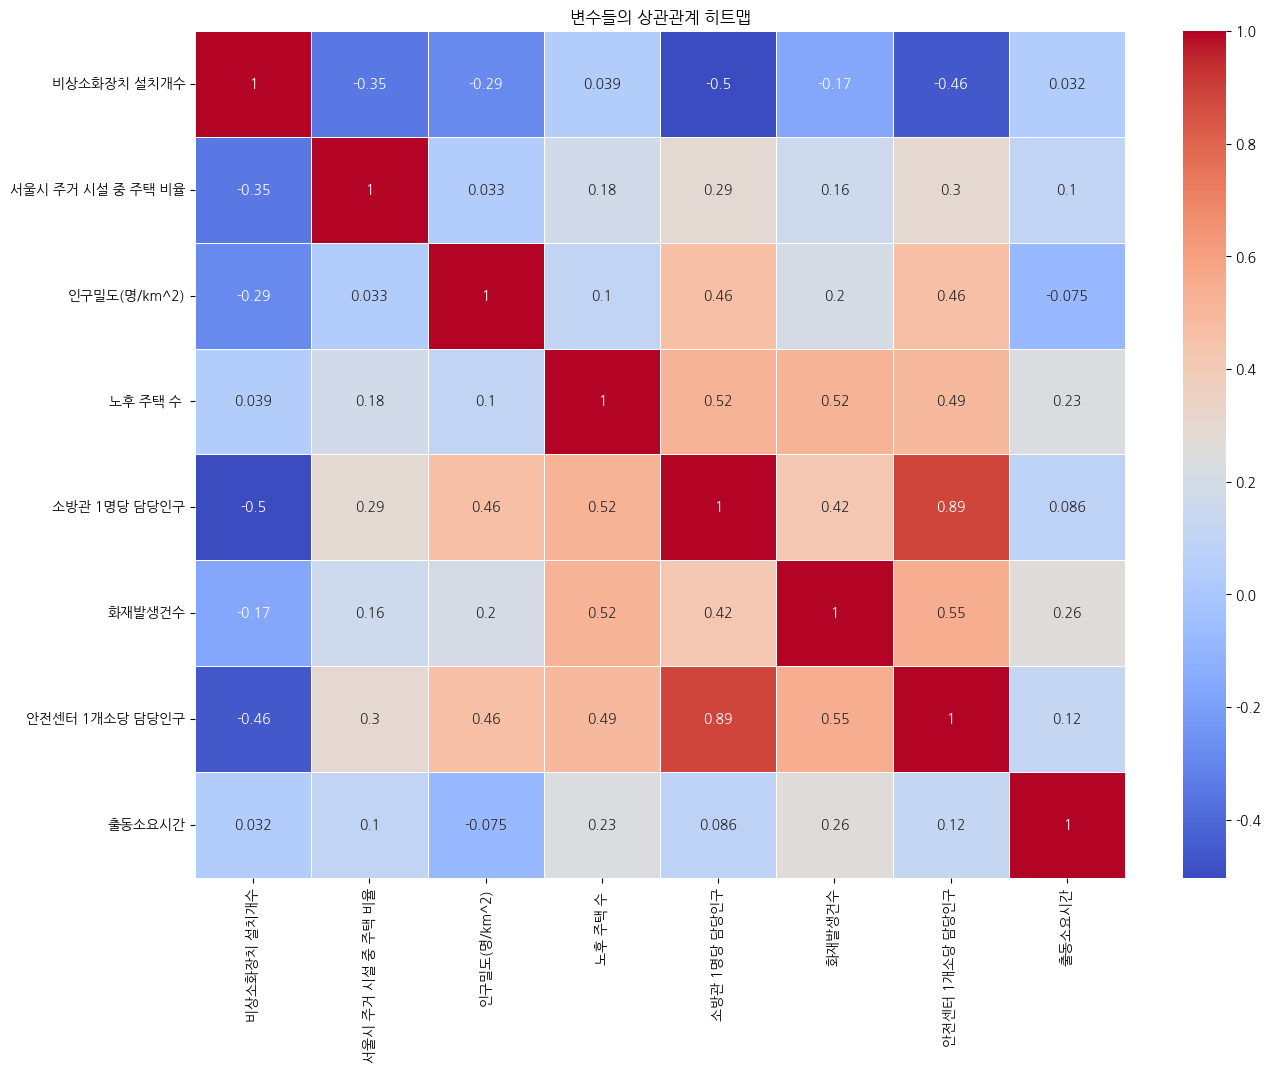

In [78]:
import seaborn as sns
# 히트맵생성
plt.figure(figsize=(15,11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('변수들의 상관관계 히트맵')

plt.savefig("result/변수들_상관관계_히트맵.png")
plt.show()

In [81]:
df.to_csv("data/include_total_rank_final.csv", encoding="utf-8-sig")